## Análise do Impacto da Black Friday nos Produtos Mais Vendidos da Amazon

A Black Friday é um dos eventos de compras mais esperados do ano, movimentando bilhões de dólares em vendas no mundo todo. No entanto, ainda existem muitas questões sobre como esse evento impacta os produtos mais vendidos, os preços e o comportamento dos consumidores. Este projeto busca entender essas dinâmicas analisando dados dos 100 produtos mais vendidos em cinco categorias na Amazon durante os 13 dias que antecederam a Black Friday e no próprio dia do evento.

### Problema a ser resolvido

O objetivo desta análise é identificar padrões e tendências no comportamento dos produtos mais vendidos antes e durante a Black Friday. Especificamente, buscamos responder às seguintes questões:

- Preços: Os preços dos produtos mais vendidos por categoria sofreram variações significativas no dia da Black Friday em comparação com os dias anteriores? Existe uma tendência de aumento ou redução nos preços conforme a data se aproxima?

- Popularidade: Alguns produtos mantiveram uma posição estável no ranking dos mais vendidos ao longo do período analisado? Houve mudanças significativas no top 10 antes e na Black Friday?

- Categorias: Alguma categoria de produtos de acordo com o ranking ganhou mais destaque na Black Friday em relação aos dias anteriores?

- Correlação entre preço e ranking: Produtos mais baratos têm maior probabilidade de aparecer no topo do ranking? Essa relação se altera no dia da Black Friday?

- Influência do dia da semana: O impacto da Black Friday nos preços é superior ao de outros dias da semana? Há padrões de variação ao longo da semana?

#### Importando a base de dados e as bibliotecas

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Definir a paleta de cores
sns.set_style("darkgrid")
sns.set_palette("muted")
sns.set_context("notebook")

In [3]:
# Importando a base de dados
base = pd.read_csv("../data/data_processed/produtos.csv")
base.head()

,nome,preco,ranking,categoria,data_raspagem
0,A empregada (A empregada – Livro 1): Bem-vinda...,44.90,1,books,2024-11-16 21:21:03
1,Depois daquele verão,17.22,2,books,2024-11-16 21:21:03
2,Como fazer amigos e influenciar pessoas,28.00,3,books,2024-11-16 21:21:04
3,Café com Deus Pai 2025: Porções Diárias de Tra...,75.33,4,books,2024-11-16 21:21:04
4,Manual de persuasão do FBI,27.99,5,books,2024-11-16 21:21:04


#### Entendendo os dados

In [4]:
# Verificando a quantidade de linhas e colunas
base.shape

(6756, 5)

In [5]:
# Verificando se possui dados faltantes
print("Quantidade de dados faltantes: ")
base.isna().sum()

Quantidade de dados faltantes: 


nome             0
preco            0
ranking          0
categoria        0
data_raspagem    0
dtype: int64

In [6]:
# Verificando se possui dados duplicados
base.duplicated().sum()

np.int64(0)

In [7]:
# Obtendo as informações de todas as colunas
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nome           6756 non-null   object 
 1   preco          6756 non-null   float64
 2   ranking        6756 non-null   int64  
 3   categoria      6756 non-null   object 
 4   data_raspagem  6756 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 264.0+ KB


- Apesar de no processo de ETL ter colocado a coluna de 'data_raspagem' como datetime, ela não veio depois de colocar em um arquivo csv. Por isso vou colocar essa variável como datetime.

In [8]:
# Alterando o tipo da coluna 'data_raspagem'
base['data_raspagem'] = pd.to_datetime(base['data_raspagem'])

#### Criação de novas colunas para ajudar na análise exploratória

In [9]:
# Verificar quais produtos ficaram no top 10
base['top10'] = base['ranking'].apply(lambda x: 1 if x <= 10 else 0)

In [10]:
# Separar uma coluna com somente o dia da extração
base['dia_da_semana'] = base['data_raspagem'].dt.day
base.head()

,nome,preco,ranking,categoria,data_raspagem,top10,dia_da_semana
0,A empregada (A empregada – Livro 1): Bem-vinda...,44.90,1,books,2024-11-16 21:21:03,1,16
1,Depois daquele verão,17.22,2,books,2024-11-16 21:21:03,1,16
2,Como fazer amigos e influenciar pessoas,28.00,3,books,2024-11-16 21:21:04,1,16
3,Café com Deus Pai 2025: Porções Diárias de Tra...,75.33,4,books,2024-11-16 21:21:04,1,16
4,Manual de persuasão do FBI,27.99,5,books,2024-11-16 21:21:04,1,16


In [11]:
# Criando uma coluna que mostre qual foi o dia da black friday
base['dia_da_black_friday'] = base['dia_da_semana'].apply(lambda x: 1 if x == 29 else 0)

In [12]:
# Verificando medidas descritivas da base
base.describe(include='all')

,nome,preco,ranking,categoria,data_raspagem,top10,dia_da_semana,dia_da_black_friday
count,6756,6756.000000,6756.000000,6756,6756,6756.000000,6756.000000,6756.000000
unique,1236,NaN,NaN,5,NaN,NaN,NaN,NaN
top,Kit 2 Puff Banquinho Redondo Decorativo Thor e...,NaN,NaN,books,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,1398,NaN,NaN,NaN,NaN
mean,NaN,310.068178,50.752812,NaN,2024-11-23 10:12:58.695825664,0.097839,22.529455,0.072084
min,NaN,1.330000,1.000000,NaN,2024-11-16 21:21:03,0.000000,16.000000,0.000000
25%,NaN,37.640000,26.000000,NaN,2024-11-19 21:46:45,0.000000,19.000000,0.000000
50%,NaN,99.500000,51.000000,NaN,2024-11-23 22:10:07,0.000000,23.000000,0.000000
75%,NaN,269.000000,76.000000,NaN,2024-11-26 22:59:57,0.000000,26.000000,0.000000
max,NaN,5506.980000,100.000000,NaN,2024-11-29 21:59:48,1.000000,29.000000,1.000000


#### Análise Univariada

<strong>Coluna nome</strong>

In [13]:
# Produtos que apareceram mais de 10 vezes
quantidade_por_produto = base['nome'].value_counts()
quantidade_por_produto[quantidade_por_produto >= 10]

nome
Kit 2 Puff Banquinho Redondo Decorativo Thor em Linho Pés Madeira Maciça Cor Bege                                   16
Apoio Para Pés AP25 Preto Masticmol                                                                                 14
Organizador Estante Livreiro Estilo Industrial Prateleira para Decoração Ambientes Livros Bolsas Sapatos - Cores    14
Organizador Livreiro Para Sala Escritório Gold Branco                                                               14
Verity                                                                                                              14
                                                                                                                    ..
Smartphone Motorola Moto G34 5G 8GB RAM Boost* 128GB Azul                                                           10
Amor, teoricamente                                                                                                  10
Stanley Copo Térmico de Cerveja sem Tampa L

In [14]:
# Verificando porque esse produto apareceu mais de 14 vezes, sendo que foram retirados os dados de 14 dias
produto = 'Kit 2 Puff Banquinho Redondo Decorativo Thor em Linho Pés Madeira Maciça Cor Bege'
base[base['nome'] == produto]

,nome,preco,ranking,categoria,data_raspagem,top10,dia_da_semana,dia_da_black_friday
1699,Kit 2 Puff Banquinho Redondo Decorativo Thor e...,99.00,3,furniture,2024-11-16 21:27:19,1,16,0
2066,Kit 2 Puff Banquinho Redondo Decorativo Thor e...,109.00,4,furniture,2024-11-17 23:29:41,1,17,0
2433,Kit 2 Puff Banquinho Redondo Decorativo Thor e...,109.00,5,furniture,2024-11-18 22:24:41,1,18,0
2803,Kit 2 Puff Banquinho Redondo Decorativo Thor e...,109.00,9,furniture,2024-11-19 21:47:03,1,19,0
3195,Kit 2 Puff Banquinho Redondo Decorativo Thor e...,109.00,6,furniture,2024-11-20 20:52:40,1,20,0
3592,Kit 2 Puff Banquinho Redondo Decorativo Thor e...,132.25,5,furniture,2024-11-21 19:04:58,1,21,0
3967,Kit 2 Puff Banquinho Redondo Decorativo Thor e...,132.25,22,furniture,2024-11-22 18:25:48,0,22,0
4357,Kit 2 Puff Banquinho Redondo Decorativo Thor e...,132.25,24,furniture,2024-11-23 22:14:39,0,23,0
4739,Kit 2 Puff Banquinho Redondo Decorativo Thor e...,132.25,16,furniture,2024-11-24 21:50:31,0,24,0
5134,Kit 2 Puff Banquinho Redondo Decorativo Thor e...,114.90,23,furniture,2024-11-25 20:46:11,0,25,0


- Podemos perceber que esse produto esteve na listagem de produtos mais vendidos duas vezes em dois dias, por isso ele apareceu 16 vezes. Como foi feito uma raspagem dos dados no período de black friday, não dá para saber se tinha esse produto duas vezes na listagem. Optei por deixar esse produto que se repete na base de dados.

In [15]:
# Produtos que ficaram na lista por 14 dias ou mais
quantidade_por_produto[quantidade_por_produto >= 14]

nome
Kit 2 Puff Banquinho Redondo Decorativo Thor em Linho Pés Madeira Maciça Cor Bege                                                                16
Apoio Para Pés AP25 Preto Masticmol                                                                                                              14
Organizador Estante Livreiro Estilo Industrial Prateleira para Decoração Ambientes Livros Bolsas Sapatos - Cores                                 14
Organizador Livreiro Para Sala Escritório Gold Branco                                                                                            14
Verity                                                                                                                                           14
                                                                                                                                                 ..
Monitor Gamer LG UltraGear 24” IPS, Full HD, 180Hz, 1ms (GtG), HDMI, DisplayPort, HDR10, sRGB 99%, NVIDIA® 

<strong>Coluna preco</strong>

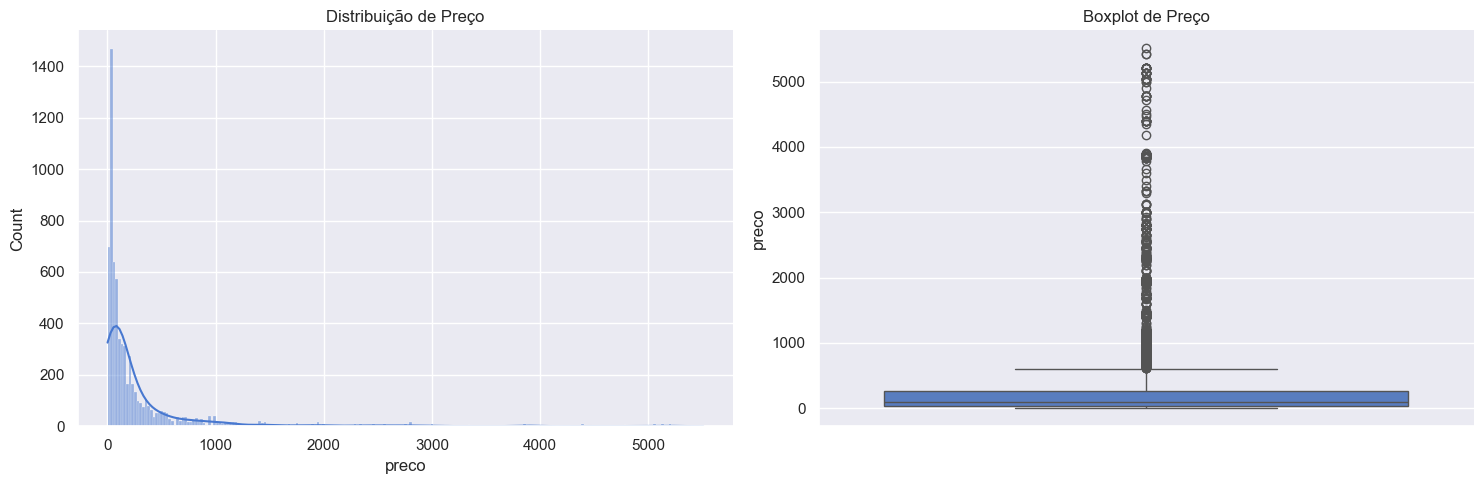

In [16]:
plt.figure(figsize=(15, 5))

# Gráfico 1 - histograma com KDE
ax1 = plt.subplot(1, 2, 1)
sns.histplot(data=base['preco'], kde=True, ax=ax1)
ax1.set_title("Distribuição de Preço")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Gráfico 2 - boxplot
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data=base, y='preco', ax=ax2)
ax2.set_title("Boxplot de Preço")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [17]:
# Verificando os valores que são outliers
q1 = np.percentile(base['preco'], 25)
q3 = np.percentile(base['preco'], 75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

outliers = base['preco'].loc[(base['preco'] < limite_inferior) | (base['preco'] > limite_superior)]

print(f"Limite inferior para ser um outlier: {limite_inferior:.2f} \nLimite superior para ser um outlier: {limite_superior}")
print(f"\nQuantidade de outliers na base: {len(outliers)}")

Limite inferior para ser um outlier: -309.40 
Limite superior para ser um outlier: 616.04

Quantidade de outliers na base: 808


- Pode-se perceber que possui alguns produtos com valores mais altos do que o restante de produtos. A base tem muitos valores que são considerados outliers. Não iremos apagar os dados que são outliers porque isso faz parte de uma base de vendas de produtos.

<strong>Coluna ranking</strong>

In [18]:
# Verificando se alguma classificação não apareceu os 14 dias
ranking = base.groupby('ranking').count()['nome'].sort_values(ascending=False)
ranking

ranking
42    70
39    70
38    70
37    70
99    70
      ..
13    65
23    65
52    65
61    65
77    65
Name: nome, Length: 100, dtype: int64

- Podemos ver que teve um dia em que não apareceu o ranking dos produtos mais vendidos.

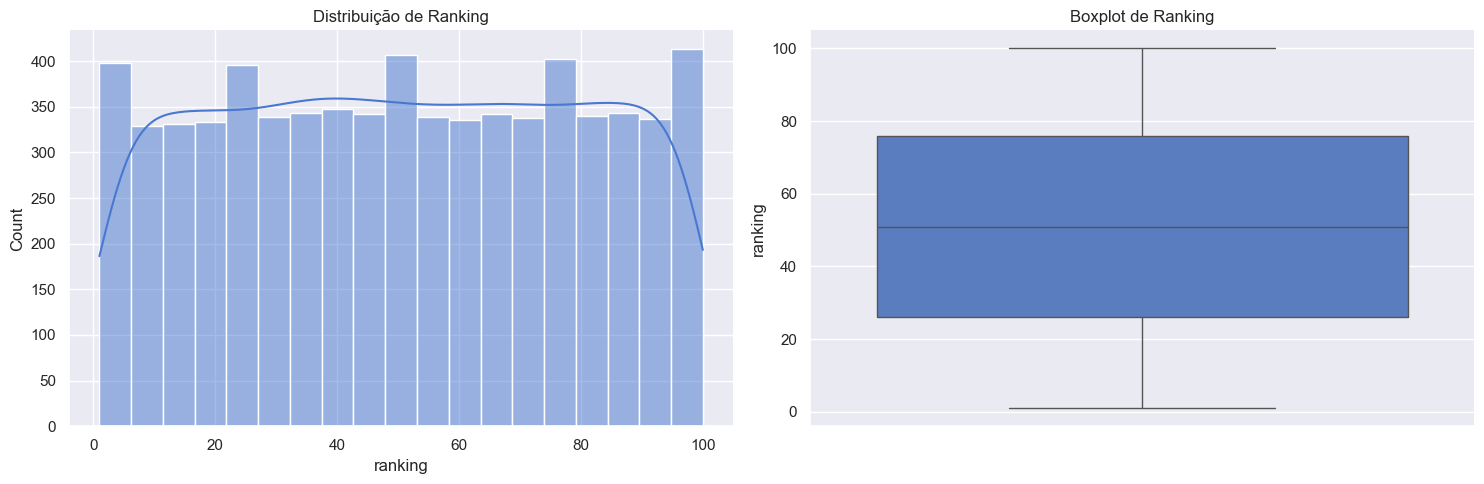

In [19]:
# Como está a distribuição dos números do ranking
plt.figure(figsize=(15, 5))

# Gráfico 1 - histograma com KDE
ax1 = plt.subplot(1, 2, 1)
sns.histplot(data=base['ranking'], kde=True, ax=ax1)
ax1.set_title("Distribuição de Ranking")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Gráfico 2 - boxplot
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data=base, y='ranking', ax=ax2)
ax2.set_title("Boxplot de Ranking")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

<strong>Coluna categoria</strong>

In [20]:
# Verificando a quantidade de produtos por categoria
base['categoria'].value_counts()

categoria
books          1398
electronics    1391
furniture      1361
fashion        1334
kitchen        1272
Name: count, dtype: int64

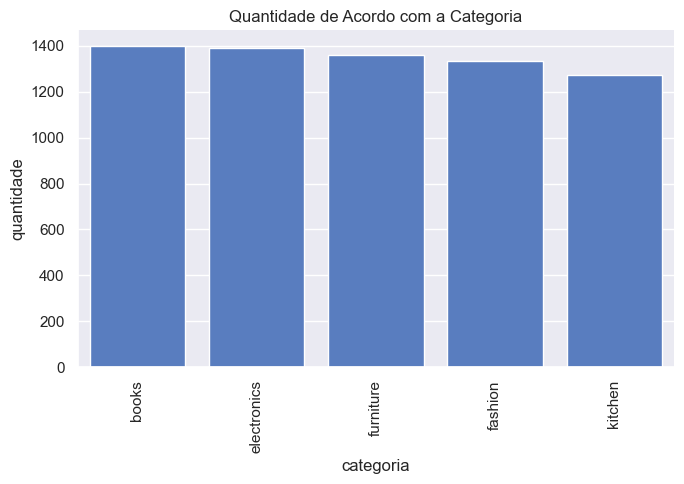

In [21]:
# Verificar como está a distribuição da categoria
categoria_counts = base['categoria'].value_counts().reset_index()
categoria_counts.columns = ['categoria', 'quantidade']

# Criando o gráfico
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=categoria_counts, x='categoria', y='quantidade')
ax.set_title('Quantidade de Acordo com a Categoria')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

- Vieram alguns dados faltando por categoria, o correto era ter 1400 registros por cada categoria.

<strong>Coluna data_raspagem</strong>

In [22]:
# Verificar a quantidade de produtos por cada data
base['data_raspagem'].value_counts()

data_raspagem
2024-11-19 21:47:29    13
2024-11-19 21:47:05    13
2024-11-19 21:47:06    13
2024-11-19 21:46:45    12
2024-11-19 21:46:43    12
                       ..
2024-11-25 20:46:23     1
2024-11-25 20:46:43     1
2024-11-26 22:57:07     1
2024-11-29 21:57:53     1
2024-11-25 20:40:26     1
Name: count, Length: 1787, dtype: int64

- Como a data de raspagem possui a hora, fica difícil saber a quantidade de produtos por data, por isso criamos uma coluna do dia da semana.

<strong>Coluna top10</strong>

In [23]:
# Verificar a quantidade de produtos ficaram no top 10
base['top10'].value_counts()

top10
0    6095
1     661
Name: count, dtype: int64

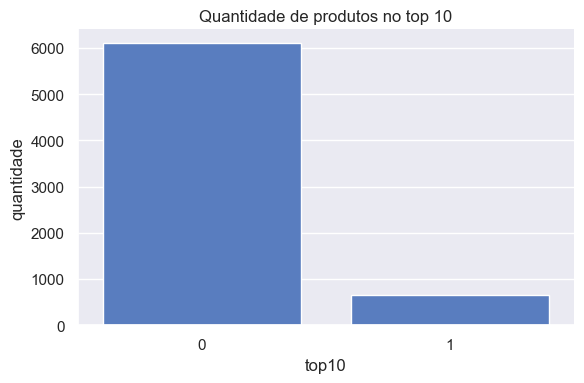

In [24]:
# Verificando graficamente como ficou a quantidade de produtos no top 10
top10_counts = base['top10'].value_counts().reset_index()
top10_counts.columns = ['top10', 'quantidade']

# Criando o gráfico
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=top10_counts, x='top10', y='quantidade')
ax.set_title("Quantidade de produtos no top 10")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

- Era para ter 700 produtos no top 10.

<strong>Coluna dia_da_semana</strong>

In [25]:
# Verificar a quantidade de produtos em um dia
base['dia_da_semana'].value_counts()

dia_da_semana
21    499
20    497
16    496
25    490
26    490
24    488
29    487
27    486
23    486
28    485
17    467
18    467
19    464
22    454
Name: count, dtype: int64

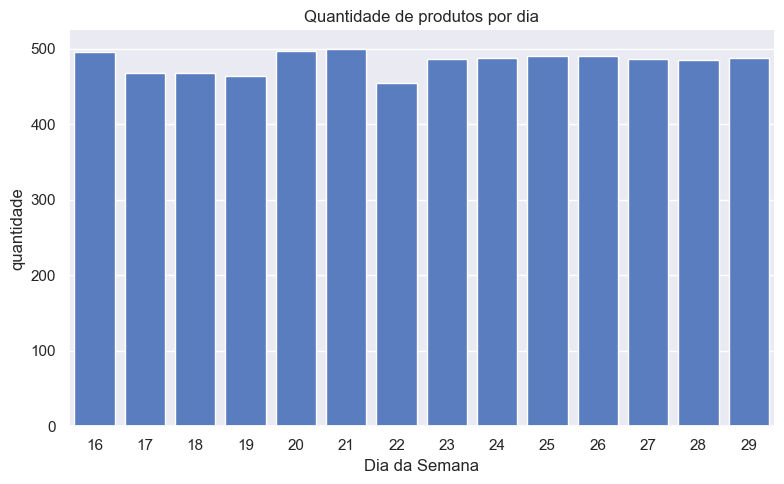

In [26]:
# Verificando graficamente como ficou a quantidade de produtos por dia
dias_counts = base['dia_da_semana'].value_counts().reset_index()
dias_counts.columns = ['dia', 'quantidade']

# Criando o gráfico
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=dias_counts, x='dia', y='quantidade')
ax.set_title("Quantidade de produtos por dia")
ax.set_xlabel("Dia da Semana")  # <- Aqui você muda o nome do eixo X
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

- O correto era ter 500 produtos por dia. Percebemos que os dias 17, 18, 19 e 22 teve menos registros de produtos vendidos.

<strong>Coluna dia_da_black_friday</strong>

In [27]:
# Verificar a quantidade de produtos vendidos na black friday
base['dia_da_black_friday'].value_counts()

dia_da_black_friday
0    6269
1     487
Name: count, dtype: int64

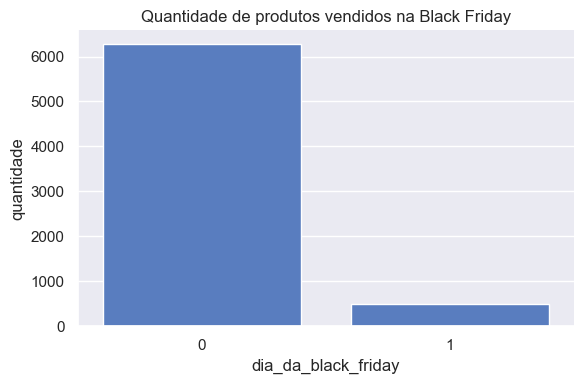

In [28]:
# Verificando graficamente como ficou a quantidade de produtos vendidos na black friday
dia_black_friday = base['dia_da_black_friday'].value_counts().reset_index()
dia_black_friday.columns = ['dia_da_black_friday', 'quantidade']

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=dia_black_friday, x='dia_da_black_friday', y='quantidade')
ax.set_title("Quantidade de produtos vendidos na Black Friday")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

<strong>Conclusões da Análise Univariada</strong>

Percebeu-se que a base de dados não possui alguns registros de vendas de alguns produtos. Na hora da extração alguns produtos deram erro na hora da extração, por isso a base de dados não bate com os valores certo com os 100 produtos nos 14 dias das 5 categorias.

##### Funçoes para ajudar na análise bivariada

In [29]:
# Função para calcular a regra de Sturges para dividir os números em classes
def regra_sturges(base, coluna):
    # tamanho
    n = base[coluna].shape[0]
    #regra de sturges
    k = 1 + 3.3 * np.log10(n)
    k = int(k.round(0))
    return k


# Função para transformar variável numérica em uma variável categórica através de classes
def segmentar_dados_numericos_categoricos(base, coluna):
    # Criando uma cópia do dataframe original
    base2 = base.copy()
    
    # Usando a regra de sturges para criar as classes
    classes = regra_sturges(base2, coluna)
    
    # Segmendo os dados numéricos em dados categóricos
    base2[coluna + '_classe'] = pd.cut(base2[coluna], bins=classes, right=False)
    
    return base2


# Função para gerar uma tabela de contigência
def gerar_tabela_contigencia(base, linha, coluna):
    cross_tab = pd.crosstab(base[linha], base[coluna], normalize='columns')
    cross_tab.columns = ['Ruim', 'Bom']
    
    return cross_tab

# Função para calcular o IV (Information Value)
def calcular_iv(base, linha, coluna_alvo):
    
    # Gerar uma tabela de contingência
    cross_tab = gerar_tabela_contigencia(base, linha, coluna_alvo)
    
    # Calcular o WoE
    cross_tab['WoE'] = np.log(cross_tab['Bom'] / cross_tab['Ruim'])
    
    # Calcular o IV
    cross_tab['IV'] = (cross_tab['Bom'] - cross_tab['Ruim']) * cross_tab['WoE']
    
    # Apagando as linhas em que os valores apareceram inf por ter ocorrido uma divisão por zero
    cross_tab = cross_tab.replace([np.inf, -np.inf], np.nan).dropna(subset=['IV'])
    
    iv_value = cross_tab['IV'].sum()
    
    if iv_value < 0.02:
        print(f"IV de {linha}: {iv_value:.2f}\nPoder de separação: Muito fraco")
    elif iv_value < 0.1:
        print(f"IV de {linha}: {iv_value:.2f}\nPoder de separação: Fraco")
    elif iv_value < 0.3:
        print(f"IV de {linha}: {iv_value:.2f}\nPoder de separação: Médio")
    elif iv_value <= 0.5:
        print(f"IV de {linha}: {iv_value:.2f}\nPoder de separação: Forte")
    else:
        print(f"IV de {linha}: {iv_value:.2f}\nPoder de separação: Muito bom para ser verdade")

#### Análise Bivariada

<strong>Colunas preco e ranking</strong>

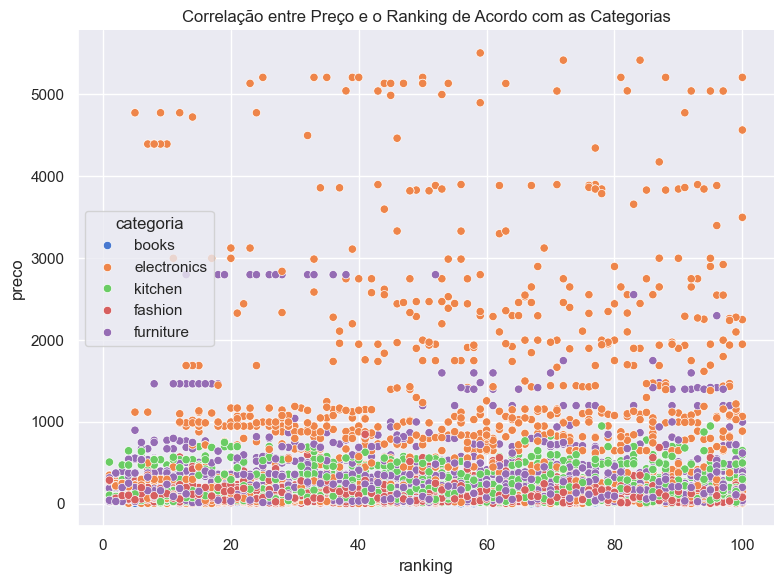

In [30]:
plt.figure(figsize=(8, 6))
ax = sns.scatterplot(data=base, x="ranking", y="preco", hue='categoria')
ax.set_title("Correlação entre Preço e o Ranking de Acordo com as Categorias")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [31]:
print("Correlação de Pearson entre o Preço e o Ranking")
base[['preco', 'ranking']].corr()

Correlação de Pearson entre o Preço e o Ranking


,preco,ranking
preco,1.000000,0.058434
ranking,0.058434,1.000000


<strong>Colunas preco e categoria</strong>

In [32]:
agrupado_categoria = base.groupby('categoria')[['preco']].mean()
agrupado_categoria

,preco
categoria,
books,36.099170
electronics,864.959669
fashion,112.445292
furniture,324.822410
kitchen,195.840998


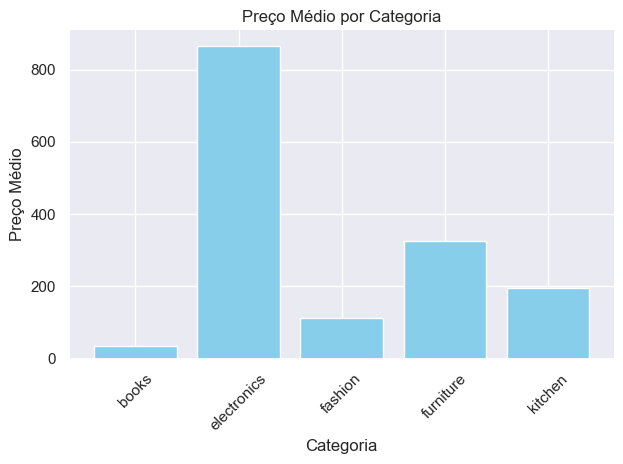

In [33]:

ax = plt.gca()

ax.bar(agrupado_categoria.index, agrupado_categoria['preco'], color='skyblue')

ax.set_xlabel("Categoria")
ax.set_ylabel("Preço Médio")
ax.set_title("Preço Médio por Categoria")
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

<strong>Colunas top10, categoria e preco</strong>

Pegamos o preço médio por categoria dos produtos que ficaram no top 10 dos mais vendidos. Vamos comparar se o preço médio dos top 10 teve uma diferença em relação a todos os produtos.

In [34]:
# Preço médio por categoria em relação aos top 10
df_top10 = base[base['top10'] == 1]
agrupado_por_categoria_top10 = df_top10.groupby(['categoria'])[['preco']].mean()
agrupado_por_categoria_top10

,preco
categoria,
books,33.297571
electronics,524.912643
fashion,112.239403
furniture,266.214676
kitchen,168.797870


In [35]:
# Preço médio por categoria em relação a todos os produtos de todos os rankings
agrupado_produtos = base.groupby(['categoria'])[['preco']].mean()
agrupado_produtos

,preco
categoria,
books,36.099170
electronics,864.959669
fashion,112.445292
furniture,324.822410
kitchen,195.840998


In [36]:
# Quantidade de vezes que top 10 apareceram por categoria
df_top10 = base[base['top10'] == 1]
agrupado_por_categoria_top10_contagem = df_top10.groupby(['categoria'])[['preco']].count()
agrupado_por_categoria_top10_contagem

,preco
categoria,
books,140
electronics,140
fashion,134
furniture,139
kitchen,108


<strong>Colunas preco e dia_da_semana</strong>

In [37]:
# Preço médio em relação ao dia da semana
agrupado_dia_da_semana = base.groupby('dia_da_semana')[['preco']].mean()
agrupado_dia_da_semana

,preco
dia_da_semana,
16,290.511653
17,294.744261
18,286.866381
19,292.145216
20,307.673320
21,294.150561
22,324.985727
23,280.230494
24,293.349201


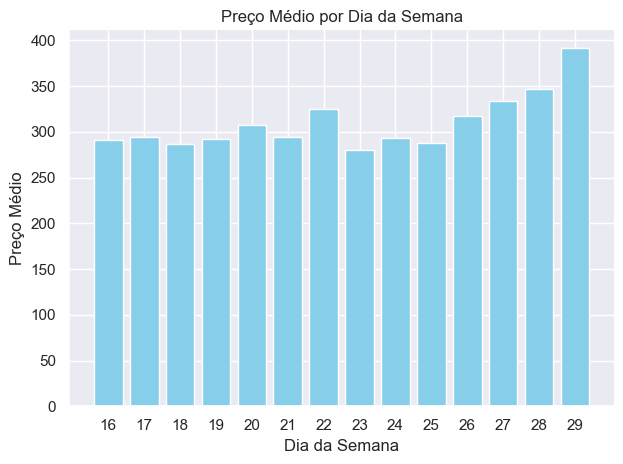

In [38]:
# Plotagem do preço médio pelo dia da semana
ax = plt.gca()

ax.bar(agrupado_dia_da_semana.index, agrupado_dia_da_semana['preco'], color='skyblue')

dias = list(range(16, 30))
ax.set_xlabel("Dia da Semana")
ax.set_ylabel("Preço Médio")
ax.set_title("Preço Médio por Dia da Semana")
ax.set_xticks(dias)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

<strong>Colunas preco, categoria e dia_da_semana</strong>

In [39]:
# Preço médio de acordo com o dia da semana e a categoria
agrupado = base.groupby(['dia_da_semana', 'categoria'])[['preco']].mean().unstack()
agrupado

preco                                                 
categoria          books  electronics     fashion   furniture     kitchen
dia_da_semana                                                            
16             37.156300   784.946200   94.693232  339.589897  195.686800
17             39.919700   757.427300  112.543333  345.785510  184.030000
18             38.428100   720.969400  110.231531  360.108889  165.334000
19             38.688100   756.795300  113.270510  331.385567  184.958406
20             39.726400   879.479100  115.100612  324.114545  176.258900
21             39.251600   807.447300  111.847273  333.719500  176.664100
22             35.070918   889.415102  119.395934  351.016429  169.264493
23             35.526100   741.294694  117.795684  295.554062  210.605670
24             32.819500   801.719200  107.678191  314.760426  199.913100
25             33.566800   827.464949  107.415158  275.254896  190.489600
26             32.719800   925.554444  110.645213  304.853299  203.737500
27             33.164200  1004.000600  105.562697  290.870309  205.839000
28             34.769900  1041.704646  114.953478  300.258144  226.426598
29             34.560400  1177.481837  134.154839  378.194271  229.618600

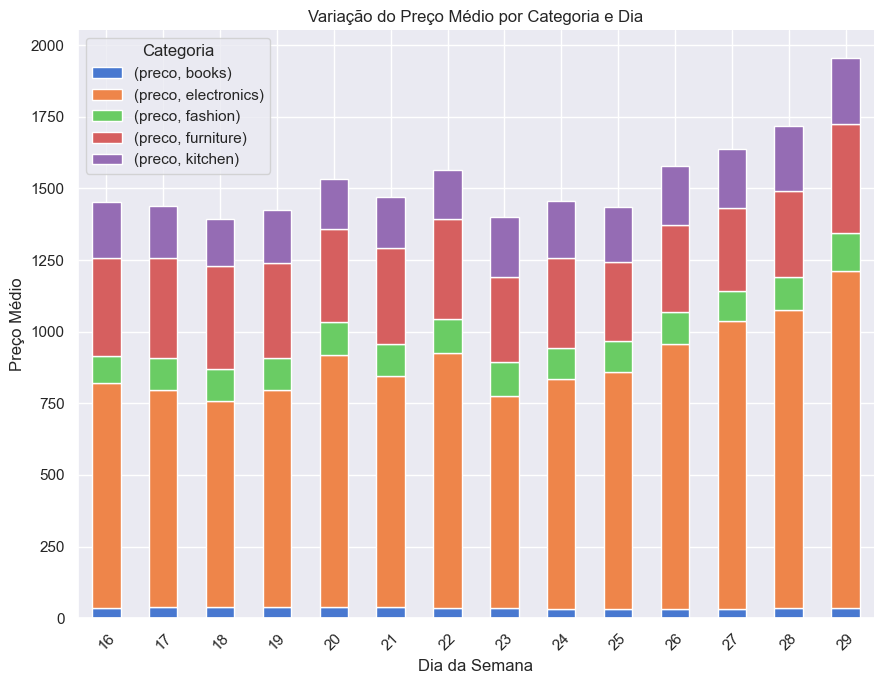

In [40]:
# Plotagem do preço médio em relação ao dia da semana e a categoria
ax = agrupado.plot(kind="bar", stacked=True, figsize=(9, 7))

ax.set_xlabel("Dia da Semana")
ax.set_ylabel("Preço Médio")
ax.set_title("Variação do Preço Médio por Categoria e Dia")
ax.legend(title="Categoria")
plt.xticks(rotation=45);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

<strong>Colunas preco, categoria e dia_da_black_friday</strong>

In [41]:
# Calcular o IV da variável preco e dia_da_black_friday
base2 = segmentar_dados_numericos_categoricos(base, 'preco')

# É preciso colocar a palavra '_classe' depois da coluna que quer olhar a relação
calcular_iv(base2, 'preco_classe', 'dia_da_black_friday')

IV de preco_classe: 0.03
Poder de separação: Fraco


In [42]:
# Preço médio por categoria dos produtos na black friday
black_friday = base[base['dia_da_black_friday'] == 1]
agrupado_black_friday = black_friday.groupby('categoria')[['preco']].mean()
agrupado_black_friday

,preco
categoria,
books,34.560400
electronics,1177.481837
fashion,134.154839
furniture,378.194271
kitchen,229.618600


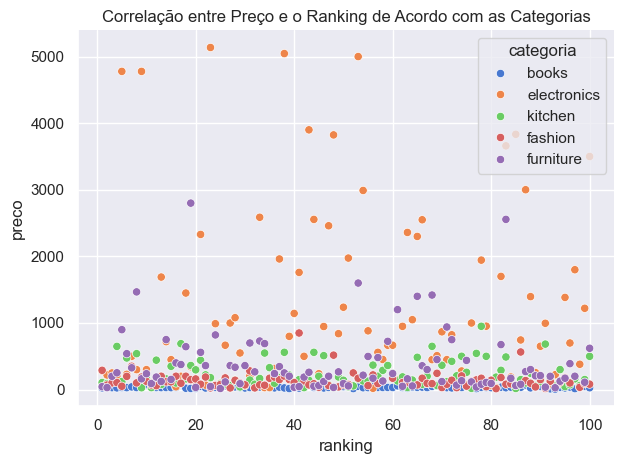

In [43]:
# Correlação entre preço e o ranking de acordo com as categorias na black friday
ax = sns.scatterplot(data=black_friday, x="ranking", y="preco", hue='categoria')
ax.set_title("Correlação entre Preço e o Ranking de Acordo com as Categorias")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

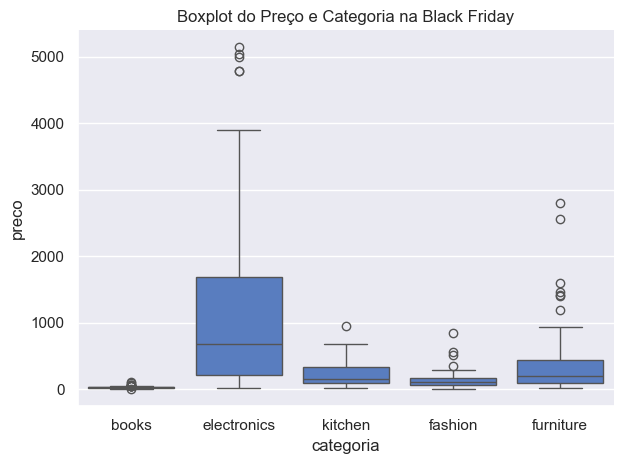

In [44]:
# Distrbuição dos dados entre preço e categoria na black friday
ax = sns.boxplot(x="categoria", y="preco", data=black_friday)
ax.set_title("Boxplot do Preço e Categoria na Black Friday")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Respondendo as perguntas

<strong>Preços: Os preços dos produtos mais vendidos por categoria sofreram variações significativas no dia da Black Friday em comparação com os dias anteriores? Existe uma tendência de aumento ou redução nos preços conforme a data se aproxima?</strong>

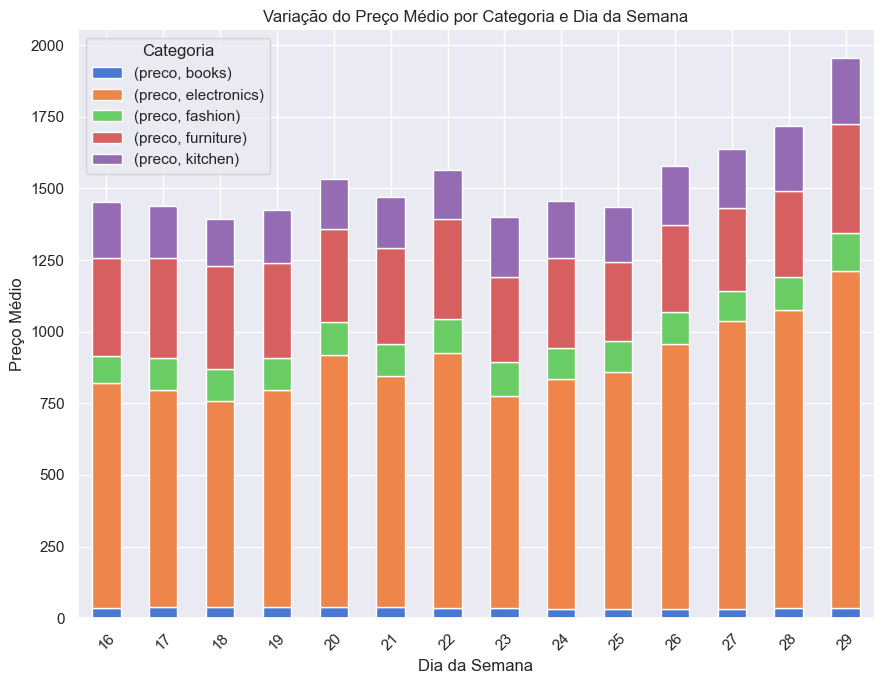

In [45]:
# Preço médio por categoria de acordo com o dia da semana de todos os produtos em todos os rankings
agrupado = base.groupby(['dia_da_semana', 'categoria'])[['preco']].mean().unstack()
ax = agrupado.plot(kind="bar", stacked=True, figsize=(9, 7))

ax.set_xlabel("Dia da Semana")
ax.set_ylabel("Preço Médio")
ax.set_title("Variação do Preço Médio por Categoria e Dia da Semana")
ax.legend(title="Categoria")
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

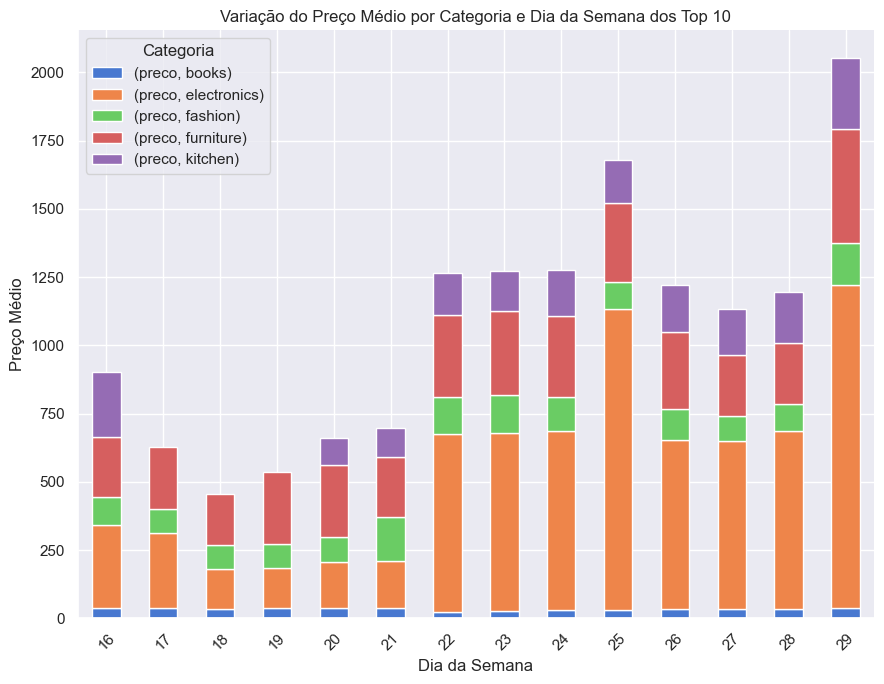

In [46]:
# Preço médio por categoria de acordo com o dia da semana somente dos produtos que ficaram no top 10
df_top10 = base[base['top10'] == 1]

agrupado_top10 = df_top10.groupby(['dia_da_semana', 'categoria'])[['preco']].mean().unstack()

ax = agrupado_top10.plot(kind="bar", stacked=True, figsize=(9, 7))

ax.set_xlabel("Dia da Semana")
ax.set_ylabel("Preço Médio")
ax.set_title("Variação do Preço Médio por Categoria e Dia da Semana dos Top 10")
ax.legend(title="Categoria")
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

- Quando você pega todos os produtos não se vê uma variação significativa do preço da Black Friday em relação aos outros dias. Isso só aconteceu com a categoria de Eletrônicos. Essa categoria a medida que foi chegando o dia da Black o preço médio foi aumentando.

- Quando você pega os produtos que ficaram no top 10 é possível ver uma variação significativa em relação ao preço médio na Black Friday. E isso aconteceu com mais categorias. A medida que a sexta feira ia se aproximando o preço médio ia subindo também.

- No dia da Black Friday é possível perceber um aumento do preço médio em quase todas as categorias.

- A única categoria que não teve quase variação nenhuma é a de livros, mantendo quase sempre constante.

<strong>Popularidade: Alguns produtos mantiveram uma posição estável no ranking dos mais vendidos ao longo do período analisado? Houve mudanças significativas no top 10 antes e na Black Friday?</strong>

Foi analisado somente os produtos que apareceram todos os dias no ranking e que ficaram no top 10.

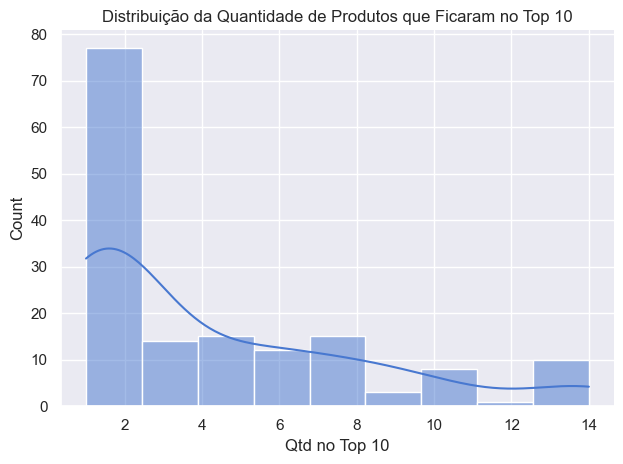

In [47]:
# Pegando somente os produtos que ficaram no top 10 em algum dia
produtos = base.copy()
produtos_top_10 = produtos[produtos['top10'] == 1]
qtd_produtos_no_top10 = produtos_top_10.groupby(['nome'])[['top10']].count()

# Distribuição da Quantidade de produtos que ficaram no top 10
ax = sns.histplot(data=qtd_produtos_no_top10, x="top10", kde=True)
ax.set_title("Distribuição da Quantidade de Produtos que Ficaram no Top 10")
ax.set_xlabel("Qtd no Top 10")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

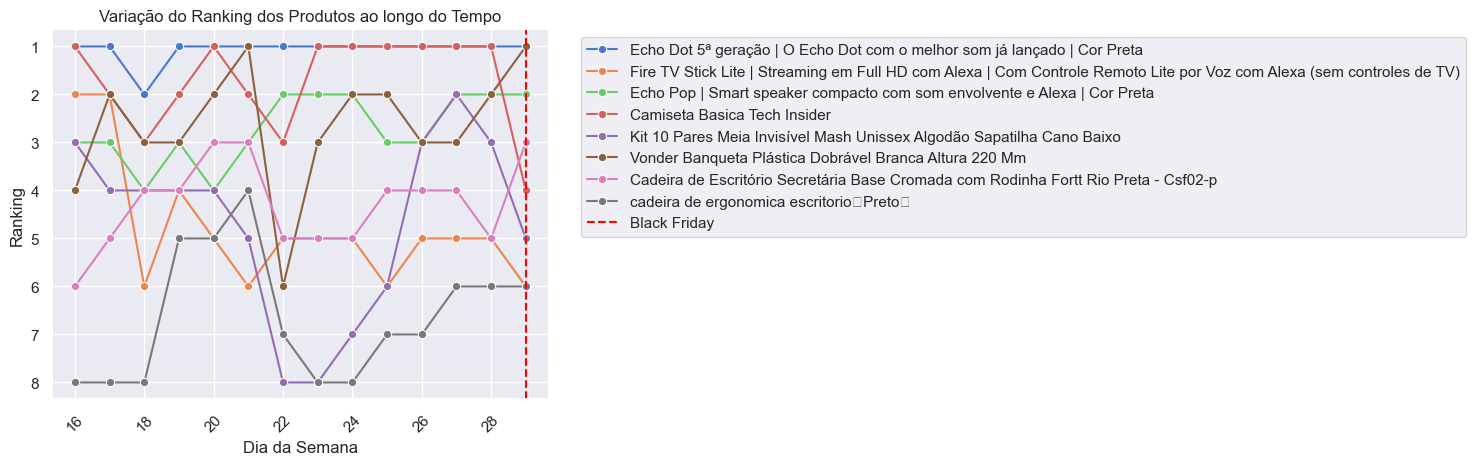

In [48]:
# Dos produtos que ficaram todos os dias no top 10
produtos_top10_todos_dias = qtd_produtos_no_top10[qtd_produtos_no_top10['top10'] == 14]

# Buscar na base de dados todas as colunas que tem os dados que apareceu os 14 dias no ranking
df_filtrado = base[base["nome"].isin(produtos_top10_todos_dias.index)]

ax = sns.lineplot(data=df_filtrado, x="dia_da_semana", y="ranking", hue="nome", marker="o")

# Adicionando linha para indicar o dia da Black Friday
black_friday_date = df_filtrado[df_filtrado["dia_da_black_friday"] == 1]["dia_da_semana"].unique()
for bf_date in black_friday_date:
    plt.axvline(bf_date, color='red', linestyle="--", label="Black Friday")

plt.gca().invert_yaxis()  # Inverte o eixo Y pois rankings menores são melhores
plt.xlabel("Dia da Semana")
plt.ylabel("Ranking")
plt.title("Variação do Ranking dos Produtos ao longo do Tempo")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

- O produto Echo Dot 5ª geração manteve uma posição estável e permaneceu como a número 1 em produtos mais vendidos na categoria de eletrônicos. O produto Echo Pop teve uma pequena variação e ficou na posição número 2.

- O produto Vonder Banqueta Plástica teve uma variação mas no dia da Black Friday ficou como número 1 na categoria de mobília.

- Os outros produtos variaram um pouco mais. Mas lembrando que todos esses ficaram no top 10 dos mais vendidos durante o período anterior e na Black Friday

<strong>Categorias: Alguma categoria de produtos de acordo com o ranking ganhou mais destaque na Black Friday em relação aos dias anteriores?</strong>

Aqui pegamos somente os produtos que ficaram no top 10 durante todos os dias, inclusive no dia da Black Friday.

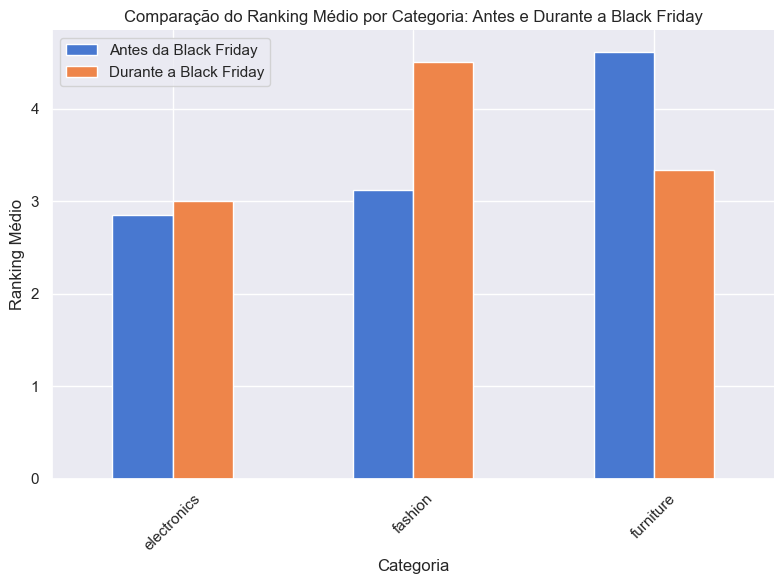

In [49]:
# Separar dados antes e durante a Black Friday
df_antes_bf = df_filtrado[df_filtrado["dia_da_black_friday"] == 0]
df_durante_bf = df_filtrado[df_filtrado["dia_da_black_friday"] == 1]

# Agrupar por categoria e calcular o ranking médio
ranking_antes = df_antes_bf.groupby("categoria")["ranking"].mean().reset_index()
ranking_durante = df_durante_bf.groupby("categoria")["ranking"].mean().reset_index()

# Renomear colunas para identificar os períodos
ranking_antes.rename(columns={"ranking": "ranking_medio_antes"}, inplace=True)
ranking_durante.rename(columns={"ranking": "ranking_medio_durante"}, inplace=True)

# Unir os dois dataframes para comparar os períodos
df_comparacao = pd.merge(ranking_antes, ranking_durante, on="categoria", how="outer").fillna(0)

# Criar gráfico de barras comparando os rankings médios
ax = df_comparacao.set_index("categoria")[["ranking_medio_antes", "ranking_medio_durante"]].plot(kind="bar", figsize=(8, 6))
ax.set_xlabel("Categoria")
ax.set_ylabel("Ranking Médio")
ax.set_title("Comparação do Ranking Médio por Categoria: Antes e Durante a Black Friday")
plt.xticks(rotation=45)
plt.legend(["Antes da Black Friday", "Durante a Black Friday"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

- Percebemos que a categoria que melhor se saiu no ranking médio foi a furniture (mobília) no dia da Black Friday.

- A categoria de eletronics se manteve quase que estável ao longo do tempo e na Black Friday.

- A categoria fashion estava indo bem nos outros dias, mas no dia da black friday ela perdeu posições.

- As outras categorias nem entraram nessa análise, por não apresentarem todos os dias no top 10.

<strong>Correlação entre preço e ranking: Produtos mais baratos têm maior probabilidade de aparecer no topo do ranking? Essa relação se altera no dia da Black Friday?</strong>

In [50]:
# Verificando se existe uma correlação entre preço e o ranking
base[['preco', 'ranking']].corr()

,preco,ranking
preco,1.000000,0.058434
ranking,0.058434,1.000000


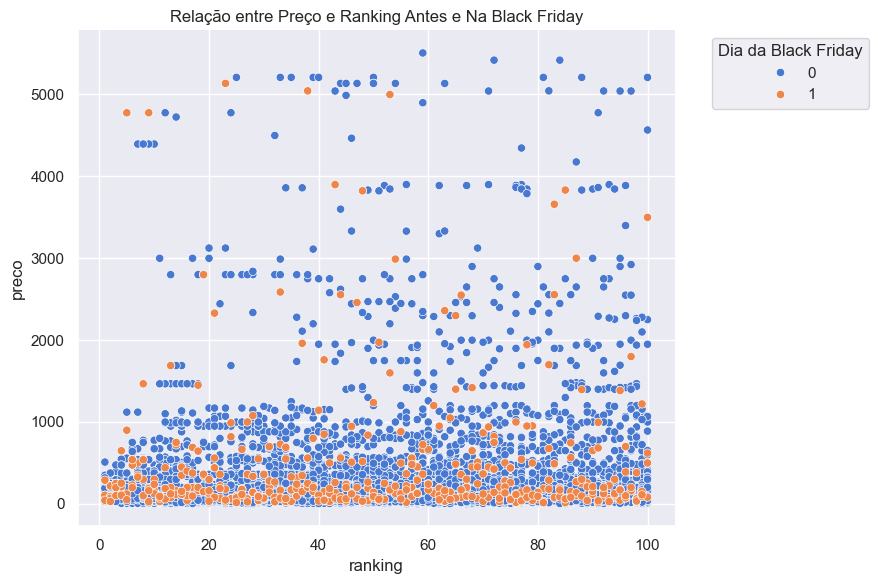

In [51]:
# Verificando se existe uma relação entre preço e ranking antes e na black friday
plt.figure(figsize=(9, 6))
ax = sns.scatterplot(data=base, x="ranking", y="preco", hue="dia_da_black_friday")

# Ajustando título
ax.set_title("Relação entre Preço e Ranking Antes e Na Black Friday")

# Removendo bordas superior e direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(title="Dia da Black Friday", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

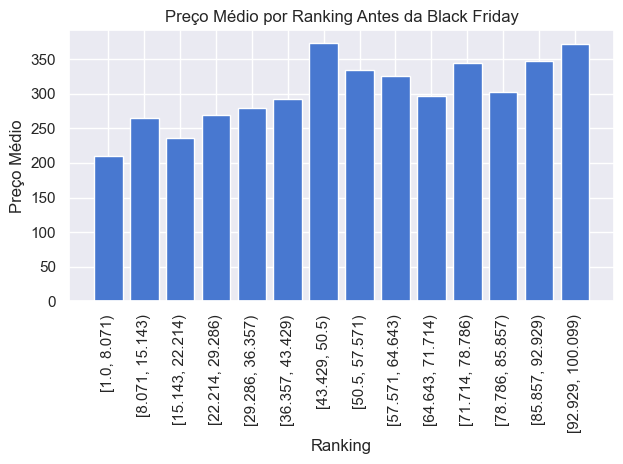

In [52]:
# Preço médio por ranking dos dias anteriores a black friday
antes_black_friday = base[base['dia_da_black_friday'] == 0]
ranking_segmentado = segmentar_dados_numericos_categoricos(antes_black_friday, 'ranking')

# Preço médio pelo dia da semana
agrupado_ranking = ranking_segmentado.groupby(['ranking_classe'])[['preco']].mean()

# Plotagem do preço médio pelo dia da semana
ax = plt.bar(agrupado_ranking.index.astype(str), agrupado_ranking['preco'])

# Ajustando título e rótulos
plt.xlabel("Ranking")
plt.ylabel("Preço Médio")
plt.title("Preço Médio por Ranking Antes da Black Friday")
plt.xticks(rotation=90)

# Removendo bordas superior e direita


plt.tight_layout()
plt.show()

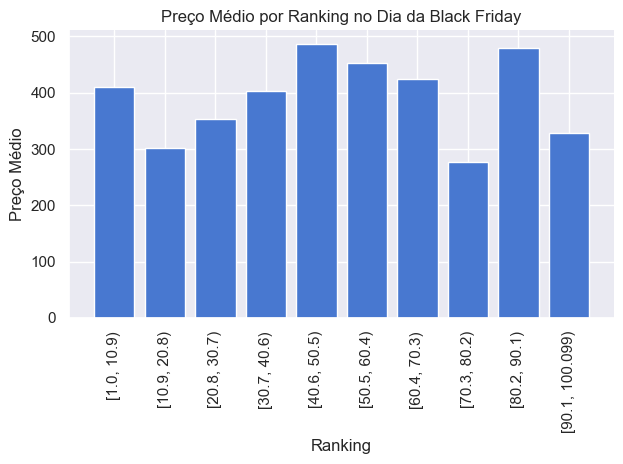

In [53]:
# Preço médio por ranking no dia da black friday
black = base[base['dia_da_black_friday'] == 1]
ranking_segmentado = segmentar_dados_numericos_categoricos(black, 'ranking')

# Preço médio pelo dia da semana
agrupado_ranking = ranking_segmentado.groupby(['ranking_classe'])[['preco']].mean()

# Plotagem do preço médio pelo dia da semana
ax = plt.bar(agrupado_ranking.index.astype(str), agrupado_ranking['preco'])

# Ajustando título e rótulos
plt.xlabel("Ranking")
plt.ylabel("Preço Médio")
plt.title("Preço Médio por Ranking no Dia da Black Friday")
plt.xticks(rotation=90)

# Removendo bordas superior e direita
ax = plt.gca()  # Captura o eixo
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

- Quando tentamos olhar se a base possuia uma correlação de Pearson, verificamos que não possuia uma relação entre o preço e o ranking.

- Agora quando dividimos o ranking em classes e geramos um gráfico de barra relacionando o preço médio com as classes do ranking, verificamos:

    - Nos dias anteriores a Black Friday, quanto menor o preço médio melhor o produto ficava no ranking.

    - No dia da Black Friday, variou muito, os menores preços médios ficaram com posições maiores do que o top 10. Teve produtos mais baratos que ficaram na posição acima de 70.

<strong>Influência do dia da semana: O impacto da Black Friday nos preços é superior ao de outros dias da semana? Há padrões de variação ao longo da semana?</strong>

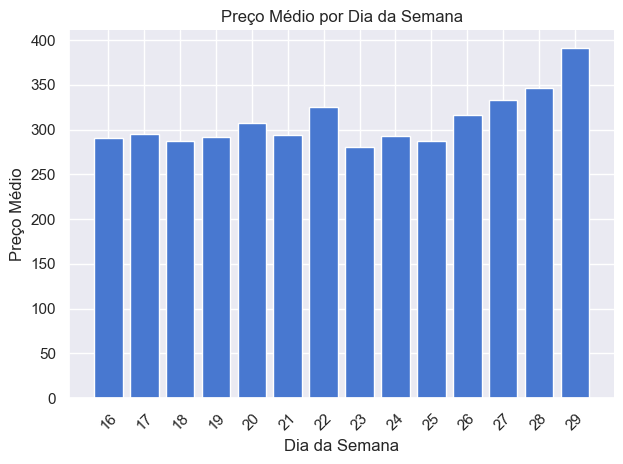

In [54]:
# Preço médio pelo dia da semana
agrupado_dia_semana = base.groupby(['dia_da_semana'])[['preco']].mean()

# Plotagem do preço médio pelo dia da semana
ax = plt.bar(agrupado_dia_semana.index, agrupado_dia_semana['preco'])

# Ajustando título e rótulos
plt.xlabel("Dia da Semana")
plt.ylabel("Preço Médio")
plt.title("Preço Médio por Dia da Semana")

# Definindo os números no eixo X de 16 até 29
plt.xticks(ticks=agrupado_dia_semana.index, labels=range(16, 30), rotation=45)

# Removendo bordas superior e direita
ax = plt.gca()  # Captura o eixo
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

- No dia da Black Friday percebemos o maior preço médio de vendas dos produtos.

- Durante os dias anteriores, você tem preços médios estáveis que começam a subir a partir do dia 26, três dias antes da black friday.

### Conclusão

Com base na análise dos produtos mais vendidos antes e durante a Black Friday, podemos concluir que os preços médios dos produtos não apresentaram uma variação significativa no geral, exceto em algumas categorias específicas, como eletrônicos, que tiveram um aumento gradual de preço conforme o evento se aproximava. Esse mesmo comportamento foi observado em produtos que permaneceram no top 10, indicando que itens mais populares podem sofrer reajustes estratégicos antes da Black Friday.

Além disso, analisando a popularidade, identificamos que alguns produtos, como o Echo Dot 5ª geração, mantiveram posições estáveis no ranking de mais vendidos, enquanto outros sofreram variações. Isso sugere que produtos com forte apelo de marca e já consolidados no mercado tendem a manter sua liderança, enquanto outras categorias enfrentam maior volatilidade.

Outro ponto importante foi a análise das categorias, onde a categoria de mobília (furniture) se destacou na Black Friday, enquanto fashion perdeu posições. Isso pode indicar mudanças nas preferências dos consumidores para determinados tipos de produtos no evento.

A correlação entre preço e ranking mostrou que, nos dias anteriores à Black Friday, produtos mais baratos tinham uma melhor colocação no ranking. No entanto, no dia da Black Friday essa relação se tornou menos previsível, com produtos baratos caindo para posições abaixo do top 10, sugerindo que fatores como promoções e marketing podem ter influenciado mais a decisão de compra do que apenas o preço.

Por fim, a influência do dia da semana foi evidente: os preços médios permaneceram estáveis ao longo dos dias, mas começaram a subir a partir do dia 26, três dias antes da Black Friday, atingindo o pico no próprio evento. Isso reforça a ideia de que, em algumas categorias, os preços podem ser reajustados para cima antes do evento, ao invés de sofrerem apenas descontos diretos.

#### Sugestões de Ação para os Próximos Anos

<strong>Análise estratégica por categoria</strong>

- Focar em categorias que tiveram alta estabilidade no ranking (ex: eletrônicos e mobília) para entender como essas marcas promovem seus produtos.

- Estudar o comportamento de categorias que perderam relevância, como fashion, para identificar possíveis fatores que impactaram suas vendas.

<strong>Estudo do impacto do marketing e promoções</strong>

- Explorar quais fatores influenciam produtos a permanecerem no top 10 e como isso pode ser replicado para outras categorias.

- Analisar os produtos que entraram e saíram do ranking para identificar padrões de comportamento dos consumidores.

<strong>Aprofundamento na relação preço vs. ranking</strong>

- Investigar por que produtos mais baratos perderam posições no ranking na Black Friday.

- Testar se descontos agressivos impactam diretamente a colocação no ranking ou se há outros fatores envolvidos.